In [103]:
print("project flow")

project flow


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [105]:
df=pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


* id: unique id
* region_code: unique code for region of customer
* annual_premium: amount customer needs to pay as premium in the year
* policy_sales_channel: code for channel of outreaching to customers i.e. different agents, over mail,over phone,In person
* vintage: time elapsed since a customer first became associated with the insurance company.

## EDA

In [106]:
df.shape

(381109, 12)

In [107]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [109]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [110]:
# Checking distribution of target variable
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

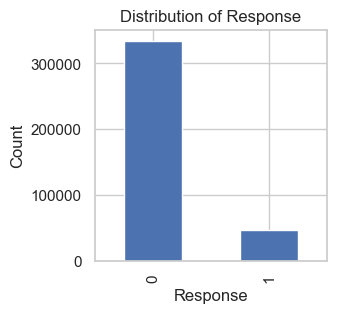

In [111]:
value_counts=df['Response'].value_counts()
plt.figure(figsize=(3,3))
value_counts.plot(kind='bar')

plt.title('Distribution of Response')
plt.xlabel('Response')
plt.ylabel('Count')

plt.show()

<Axes: >

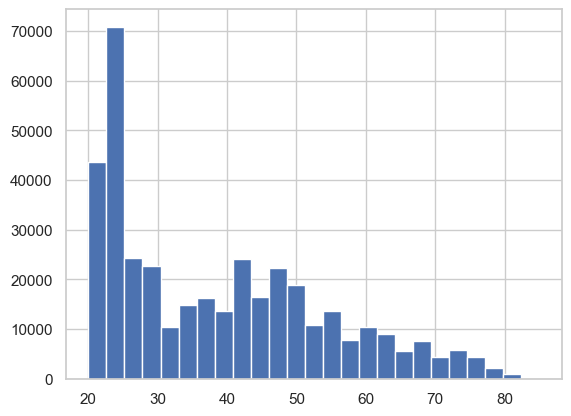

In [112]:
df['Age'].hist(bins=25)
# bins is for ranges

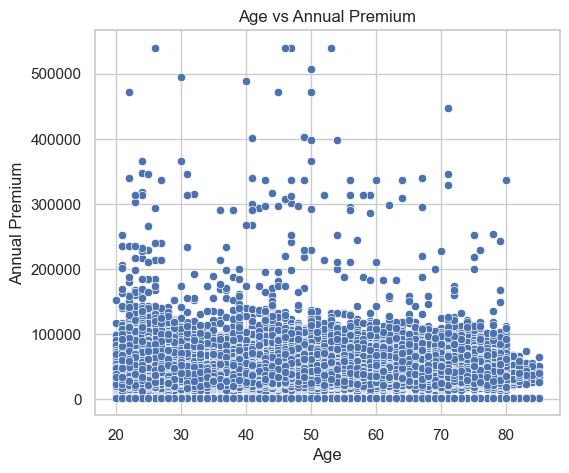

In [113]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Annual_Premium',data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

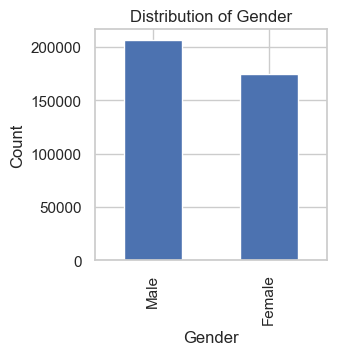

In [114]:
value_counts=df['Gender'].value_counts()
plt.figure(figsize=(3,3))
value_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [115]:
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

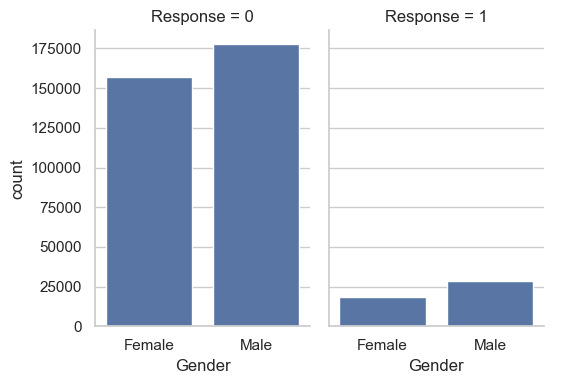

In [116]:
data=df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g=sns.catplot(x="Gender", y="count", col="Response", data=data, kind="bar", height=4, aspect=.7)

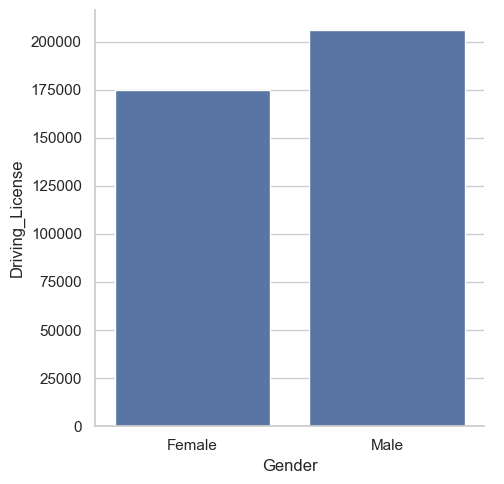

In [117]:
data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x='Gender',y='Driving_License',data=data,kind='bar')

In [118]:
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

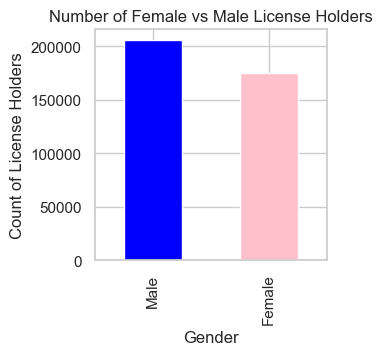

In [119]:
license_holders=df[df['Driving_License']==1]
gender_counts=license_holders['Gender'].value_counts()

plt.figure(figsize=(3,3))
gender_counts.plot(kind='bar',color=['blue','pink'])
plt.title('Number of Female vs Male License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.show()


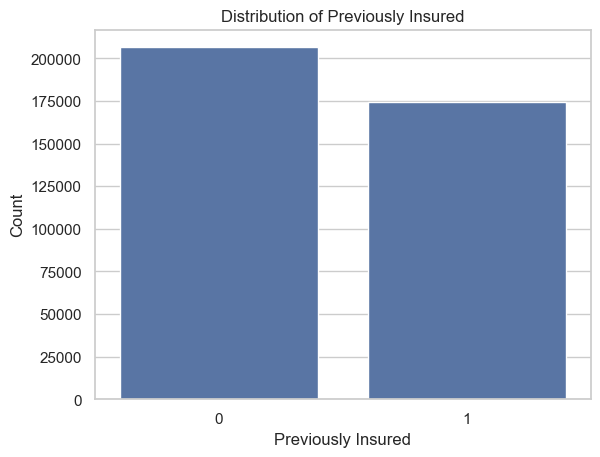

In [120]:
sns.countplot(x='Previously_Insured',data=df)
plt.title('Distribution of Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.show()

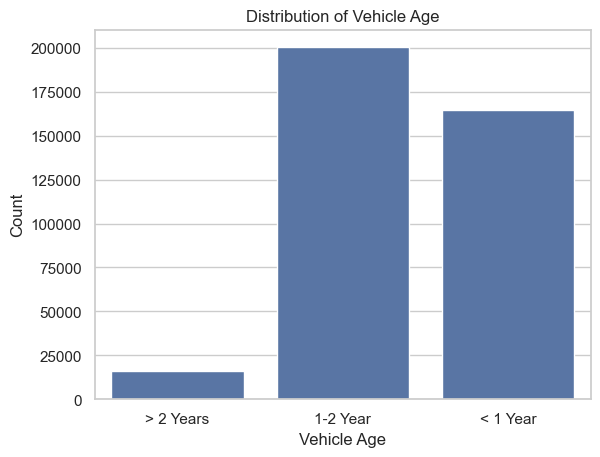

In [121]:
sns.countplot(x='Vehicle_Age',data=df)
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

In [122]:
data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


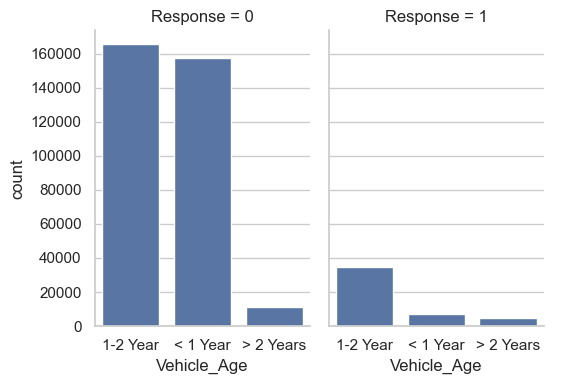

In [123]:
g=sns.catplot(x="Vehicle_Age", y="count", col="Response", data=data, kind="bar", height=4, aspect=.7)

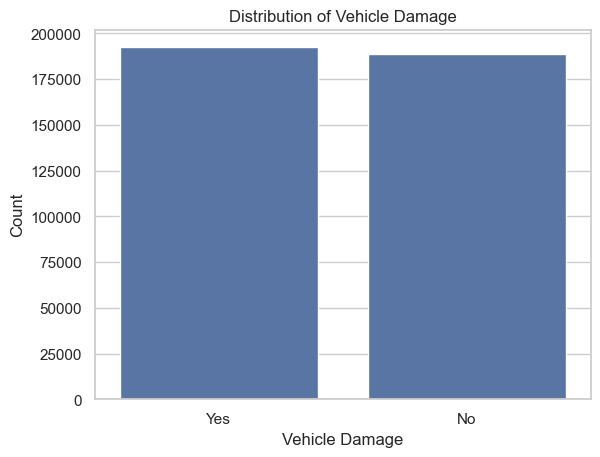

In [124]:
sns.countplot(x='Vehicle_Damage',data=df)
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

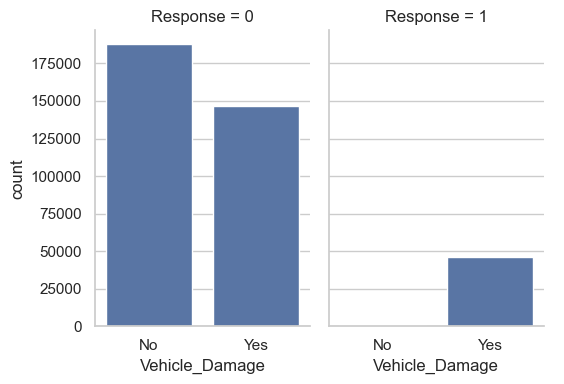

In [125]:
data=df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g=sns.catplot(x="Vehicle_Damage", y="count", col="Response", data=data, kind="bar", height=4, aspect=.7)

In [126]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

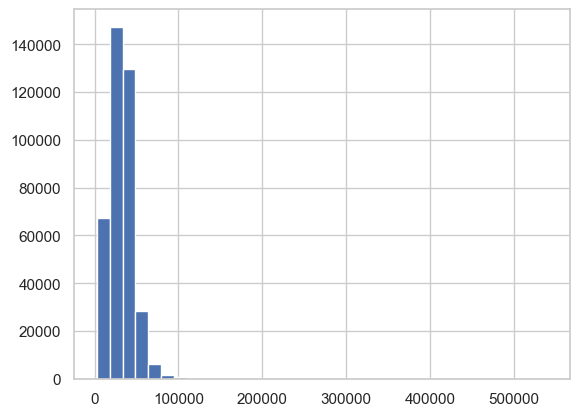

In [128]:
df['Annual_Premium'].hist(bins=35)

In [131]:
df[df['Annual_Premium']>200000].shape

(112, 12)

## Data Preprocessing

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [67]:
num_feat=['Age','Vintage']
cat_feat=['Gender','Driving_License','Previously_Insured','Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [65]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1}).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [66]:
for col in df.columns:
    print(f'{col} : {df[col].dtype}')

id : int64
Gender : int64
Age : int64
Driving_License : int64
Region_Code : float64
Previously_Insured : int64
Vehicle_Age : object
Vehicle_Damage : object
Annual_Premium : float64
Policy_Sales_Channel : float64
Vintage : int64
Response : int64


In [68]:
# one hot encoding
df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [69]:
for col in df.columns:
    print(f'{col} : {df[col].dtype}')

id : int64
Gender : int64
Age : int64
Driving_License : int64
Region_Code : float64
Previously_Insured : int64
Annual_Premium : float64
Policy_Sales_Channel : float64
Vintage : int64
Response : int64
Vehicle_Age_< 1 Year : bool
Vehicle_Age_> 2 Years : bool
Vehicle_Damage_Yes : bool


In [71]:
df=df.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_lt_1_Year','Vehicle_Age_> 2 Years':'Vehicle_Age_gt_2_Years'})
df['Vehicle_Age_lt_1_Year']=df['Vehicle_Age_lt_1_Year'].astype(int)
df['Vehicle_Age_gt_2_Years']=df['Vehicle_Age_gt_2_Years'].astype(int)

for col in cat_feat:
    df[col]=df[col].astype('str')

In [73]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

ss=StandardScaler()
df[num_feat]=ss.fit_transform(df[num_feat])

mm=MinMaxScaler()
df['Annual_Premium']=mm.fit_transform(df[['Annual_Premium']])

id=df.id
df.drop('id',axis=1,inplace=True)
df.head(2)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,True
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,False


In [74]:
from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop('Response',axis=1)
x_train,x_test,y_train,y_test=train_test_split(train,train_target,test_size=0.2,random_state=42)

In [84]:
train.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,True
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,False


In [85]:
x_train=x_train.replace({'True':1,'False':0})
x_test=x_test.replace({'True':1,'False':0})
x_train.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
332803,0,0.011438,1,15.0,0,0.093531,55.0,0.868311,0,0,1
116248,1,-0.053030,1,11.0,0,0.037966,26.0,-1.498095,0,0,1


## Model Trainer

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search={
    'criterion':['gini','entropy'],
    'n_estimators':[300],
    'max_depth':[2,3,4,5,6,7,8,10],
    'min_samples_split':[5,7,10], # minimum number of samples required to split an internal node
    'min_samples_leaf':[4,6,8] # minimum number of samples required to be at a leaf node
}

clf=RandomForestClassifier()
# n_iter samples are randomly selected from the hyperparameter space
model=RandomizedSearchCV(estimator=clf,param_distributions=random_search,n_iter=10,cv=4,n_jobs=-1,verbose=1,random_state=42)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=42, verbose=1)

In [92]:
best_parms=model.best_params_
print(best_parms)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'gini'}


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

my_parms={'n_estimators': [300], 'min_samples_split': [5], 'min_samples_leaf': [6], 'max_depth': [10], 'criterion': ['gini']}

clf = RandomForestClassifier()
model=RandomizedSearchCV(estimator=clf,param_distributions=my_parms,n_iter=10,cv=4,verbose=1,random_state=101,n_jobs=-1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10],
                                        'min_samples_leaf': [6],
                                        'min_samples_split': [5],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [100]:
import pickle

filename='rf_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [101]:
rf_model=pickle.load(open(filename,'rb'))

## Model Evaluation

In [102]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_pred=rf_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

